In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install sentinelhub
!pip install eo-learn-features
!pip install eo-learn

     |████████████████████████████████| 201 kB 5.4 MB/s 
     |████████████████████████████████| 3.1 MB 39.7 MB/s 
     |████████████████████████████████| 131 kB 58.6 MB/s 
     |████████████████████████████████| 8.5 MB 39.9 MB/s 
     |████████████████████████████████| 6.3 MB 61.4 MB/s 
     |████████████████████████████████| 132 kB 73.5 MB/s 
     |████████████████████████████████| 79 kB 7.4 MB/s 
     |████████████████████████████████| 127 kB 75.3 MB/s 
     |████████████████████████████████| 47 kB 3.6 MB/s 
  Created wheel for sentinelhub: filename=sentinelhub-3.4.3-py3-none-any.whl size=216373 sha256=a8cff629fd8bde547002f17283c8c52528e4ac88eb54237d6529567d9d04ff61
  Stored in directory: /root/.cache/pip/wheels/d8/50/c8/af0007ff3e658ea0b9b1081523a7f6a8686e93fe20e89d59fb
  Created wheel for utm: filename=utm-0.7.0-py3-none-any.whl size=6108 sha256=9452d414e4c5903e9d5e2e384f4d780dff3efbbf24d03490cb52464e09657b76
  Stored in directory: /root/.cache/pip/wheels/a5/b0/12/7ee4fdb0f9fbb415

     |████████████████████████████████| 69 kB 4.0 MB/s 
     |████████████████████████████████| 1.0 MB 37.7 MB/s 
     |████████████████████████████████| 133 kB 65.4 MB/s 
     |████████████████████████████████| 15.4 MB 38.6 MB/s 
     |████████████████████████████████| 10.5 MB 5.4 MB/s 
     |████████████████████████████████| 53.9 MB 1.2 MB/s 
     |████████████████████████████████| 19.3 MB 124 kB/s 
     |████████████████████████████████| 994 kB 75.1 MB/s 
     |████████████████████████████████| 44 kB 2.3 MB/s 
     |████████████████████████████████| 1.4 MB 63.5 MB/s 
  Created wheel for thunder-registration: filename=thunder_registration-1.0.1-py2.py3-none-any.whl size=5342 sha256=f48385b1b0544ea681f9a5b9e8529dc265c240adc7e1ee54570db1baa6213ef9
  Stored in directory: /root/.cache/pip/wheels/07/48/ce/71fd2426d1bff16e69c41f8e98bdd08b95a3986369582612ba
  Created wheel for thunder-python: filename=thunder_python-1.4.2-py3-none-any.whl size=43290 sha256=0f60b83cb5f7d1a64df470c464354f0e3d

In [ ]:
# generic imports
import os
import imageio
import datetime
import numpy as np
from sentinelhub import BBox, CRS, MimeType, DataCollection, SHConfig
# sentinelhub-py and eo-learn imports
from sentinelhub.geometry import BBox
#from sentinelhub.constants import CRS, DataSource
from eolearn.core import EOTask, FeatureType, LinearWorkflow, SaveTask, OverwritePermission
from eolearn.io import SentinelHubInputTask
from eolearn.features import SimpleFilterTask, HaralickTask
#from eolearn.coregistration import ThunderRegistration
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/yaml/constructor.py:126: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  if not isinstance(key, collections.Hashable):


In [ ]:
CLIENT_ID = 'd3940d55-466a-4a19-939a-e9e2d3de8749'
CLIENT_SECRET = 'C>M6Af,-!}<ImM,Z1BoB&L,Ou{)Mp1Dz!>{TTaXy'
INSTANCE_ID = '930e6fbb-480d-415c-a9a7-2c91232c1454'
config = SHConfig()
if CLIENT_ID and CLIENT_SECRET:
        config.sh_client_id = CLIENT_ID
        config.sh_client_secret = CLIENT_SECRET
        config.instance_id = INSTANCE_ID

if config.sh_client_id == '' or config.sh_client_secret == '':
        print("Warning! To use Sentinel Hub services, please provide the credentials (client ID and client secret).")

In [ ]:
import geopandas as gpd
from sentinelhub import BBoxSplitter
forest = gpd.read_file('/content/drive/MyDrive/Учёба/Forest/data/Bratsk/Masks/In/super_resolution_points.geojson')

In [ ]:
bbox_splitter = BBoxSplitter(list(forest.geometry), CRS.WGS84, (2, 2))  # bounding box will be split into grid of 2x2 bounding boxes

print('Area bounding box: {}\n'.format(bbox_splitter.get_area_bbox().__repr__()))

bbox_list = bbox_splitter.get_bbox_list()
info_list = bbox_splitter.get_info_list()

print('Each bounding box also has some info how it was created.\nExample:\n'
      'bbox: {}\ninfo: {}\n'.format(bbox_list[0].__repr__(), info_list[0]))

Area bounding box: BBox(((653226.8706444837, 6272574.904258895), (682891.2375049298, 6305568.118688349)), crs=CRS('4326'))

Each bounding box also has some info how it was created.
Example:
bbox: BBox(((653226.8706444837, 6272574.904258895), (668059.0540747067, 6289071.511473622)), crs=CRS('4326'))
info: {'parent_bbox': BBox(((653226.8706444837, 6272574.904258895), (682891.2375049298, 6305568.118688349)), crs=CRS('4326')), 'index_x': 0, 'index_y': 0}



In [ ]:
#bbox_raw = [101.4941203,  56.5618019, 101.999782,  56.9985397]
#bbox_raw = [101.4980449 ,  56.56612683, 101.99272697,  56.86618729]
#bbox_raw = [101.4980449 ,  56.56612683, 101.99272697,  56.86618729]
#bbox = BBox(bbox_raw, crs = CRS.WGS84)
time_interval = ['2020-08-09','2020-08-10']

In [ ]:
# Define predicate for filtering frames based on cloud coverage
class MaxCCPredicate:
    def __init__(self, maxcc):
        self.maxcc = maxcc

    def __call__(self, mask):
        height, width, depth = mask.shape
        cc = np.sum(mask) / (height * width)
        return cc <= self.maxcc

In [ ]:
# 1. Add Sentinel-2 TRUE_COLOR images AND cloud masks
input_task = SentinelHubInputTask(
    data_collection = DataCollection.SENTINEL2_L2A,
    #bands_feature=(FeatureType.DATA, 'TRUE-COLOR-S2-L1C'),
    bands_feature=(FeatureType.DATA, 'BANDS-S2-L2A'),
    #bands=['B04', 'B03', 'B02'],
    #bands=['B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B11', 'B12'],
    bands=['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B11', 'B12'],
    resolution=10,
    maxcc=1.0,
    time_difference=datetime.timedelta(hours=4),
    
    #additional_data=[
    #    (FeatureType.MASK, 'dataMask'),
    #    (FeatureType.MASK, 'CLM')
    #],
    config=config)

In [ ]:
task_har = ['ASM', 'contrast', 'correlation', 'dissimilarity', 'energy', 'homogeneity', 'difference_entropy', 'difference_variance', 'inverse_difference_moment', 'sum_average', 'sum_entropy', 'sum_of_square_variance', 'sum_variance']

In [ ]:
for task_i in task_har:
    print(task_i)
    for i, bbox_tile in enumerate(bbox_list):
        if not os.path.exists('/content/drive/MyDrive/Учёба/Forest/HaralickTask_all_part_improve/'+task_i+'/'+str(i)+'/'):
            print('     ', i)
            #add_filter = HaralickTask((FeatureType.DATA, 'TRUE-COLOR-S2-L1C'), texture_feature=task_i)
            add_filter = HaralickTask((FeatureType.DATA, 'BANDS-S2-L2A'), texture_feature=task_i, distance=3, angle=0, levels=8, window_size=3, stride=1)
            workflow = LinearWorkflow(input_task, add_filter)
            crs_name = "UTM_47N"
            bbox = BBox(list(bbox_tile), crs = CRS[crs_name])
            result = workflow.execute({input_task: {'bbox': bbox, 'time_interval': time_interval}})
            eop = result.eopatch()
            eop.save('/content/drive/MyDrive/Учёба/Forest/HaralickTask_all_part_improve/'+task_i+'/'+str(i)+'/', overwrite_permission=OverwritePermission.OVERWRITE_FEATURES)
        else:
            print('     ', i, '    уже было')
    print('Сохранено')

inverse_difference_moment
      0     уже было
      1     уже было
      2     уже было
      3     уже было
Сохранено
sum_average
      0     уже было
      1     уже было
      2     уже было
      3     уже было
Сохранено
sum_entropy
      0     уже было
      1     уже было
      2     уже было
      3
Сохранено
sum_of_square_variance
      0
      1
      2
      3
Сохранено


In [ ]:
ts_idx = 0
example_input_scene = eop.data['BANDS-S2-L1C'][ts_idx]
example_output_scene = eop.data['BANDS-S2-L1C_HARALICK'][ts_idx]

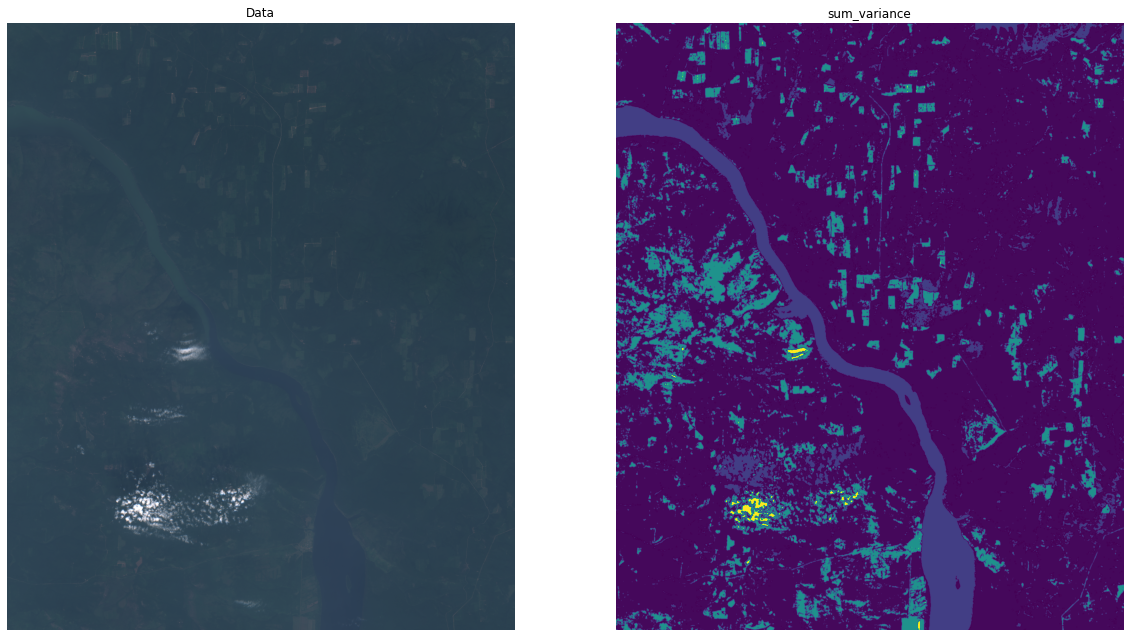

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,20))
ax = axs[0]
ax.imshow(np.clip(example_input_scene[..., [2,1,0]]*2.5, 0, 1))
ax.set_title("Data")
ax.set_axis_off()
ax = axs[1]
#ax.imshow(np.clip(example_output_scene[..., [2,1,0]]*2.5, 0, 1))
ax.imshow(example_output_scene[:,:,8])
ax.set_title(task_i)
ax.set_axis_off()

In [ ]:
ts_idx = 0
example_input_scene = eop.data['TRUE-COLOR-S2-L1C'][ts_idx]
example_output_scene = eop.data['TRUE-COLOR-S2-L1C_HARALICK'][ts_idx]

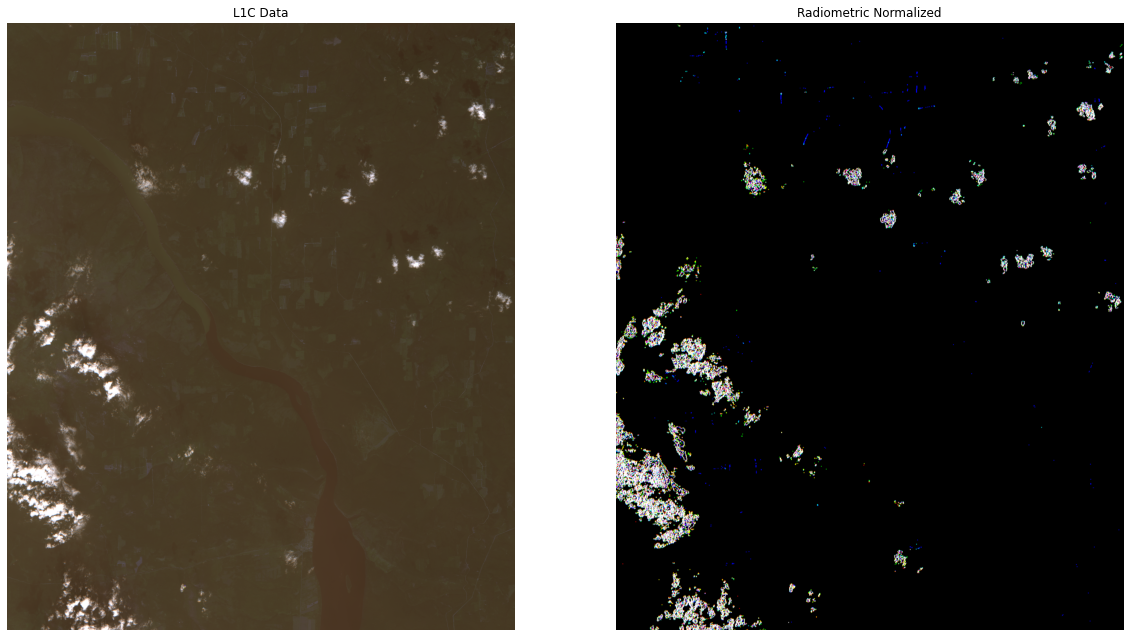

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,20))

ax = axs[0]
ax.imshow(np.clip(example_input_scene[..., [2,1,0]]*2.5, 0, 1))
ax.set_title("L1C Data")
ax.set_axis_off()

ax = axs[1]
ax.imshow(np.clip(example_output_scene[..., [2,1,0]]*2.5, 0, 1))
ax.set_title("Radiometric Normalized")
ax.set_axis_off()

In [ ]:
tasseled_cap_input = tasseled_cap_index_for_sentinel2(example_input_scene)
tasseled_cap_output = tasseled_cap_index_for_sentinel2(example_output_scene)

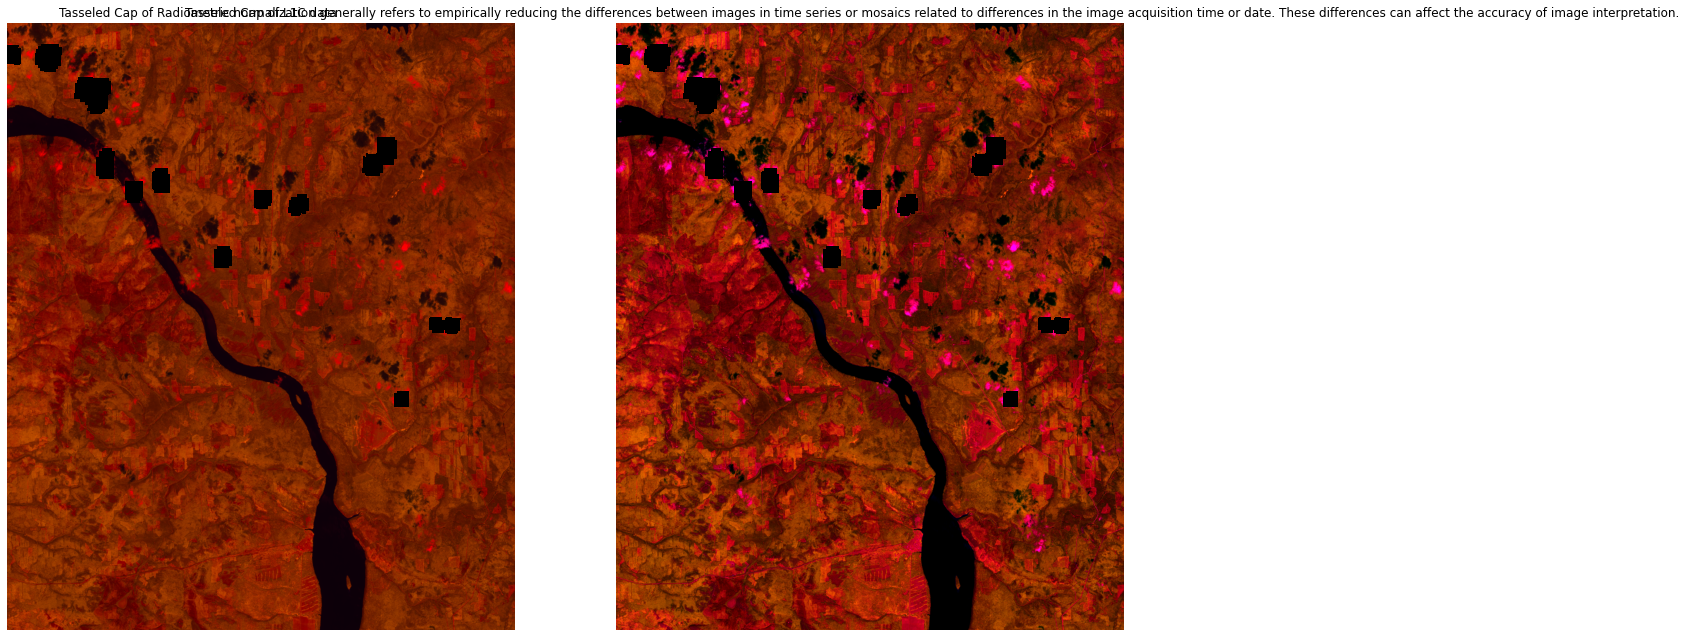

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,20))

ax = axs[0]
ax.imshow(np.clip(tasseled_cap_input, 0, 1))
ax.set_title("Tasseled Cap of L1C data")
ax.set_axis_off()

ax = axs[1]
ax.imshow(np.clip(tasseled_cap_output, 0, 1))
ax.set_title("Tasseled Cap of Radiometric normalization generally refers to empirically reducing the differences between images in time series or mosaics related to differences in the image acquisition time or date. These differences can affect the accuracy of image interpretation.")
ax.set_axis_off()